## BCIS 5110 Analysis of JD Data

In [ ]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### We will analyze JD Data in the rest of our assignments.
The objective: to build models to accurately predict delivery times for customer orders.<br>
The data: We need the following tables from the JD.com data<br>
        1. Order<br>
        2. User<br>
        3. Delivery<br>
        4. Inventory<br>
        5. Network<br>        

#### Assignment 8 include Q1 - Q10.

1. Import necessary packages.

In [1]:
import pandas as pd

2. Read in the five csv files.

In [2]:
order_df = pd.read_csv(r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_order_data.csv")
user_df = pd.read_csv(r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_user_data.csv")
delivery_df = pd.read_csv(r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_delivery_data.csv")
inventory_df = pd.read_csv(r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_inventory_data.csv")
network_df = pd.read_csv(r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_network_data.csv")

3. Display a sample of each data frame. How many observations? How many columns? What are the column names? (Use code to display such information.)

In [3]:
dataframes = [order_df, user_df, delivery_df, inventory_df, network_df]
for df in dataframes:
    display(df.head())  
    print(f"Observations: {df.shape[0]}")
    print(f"Columns: {df.shape[1]}")
    print(f"Column names: {df.columns.tolist()}\n")


,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
0,d0cf5cc6db,0abe9ef2ce,581d5b54c1,2018-03-01,2018-03-01 17:14:25.0,1,2,-,89.0,79.0,0.0,10.0,0.0,0.0,0,4,28
1,7444318d01,33a9e56257,067b673f2b,2018-03-01,2018-03-01 11:10:40.0,1,1,2,99.9,53.9,5.0,41.0,0.0,0.0,0,28,28
2,f973b01694,4ea3cf408f,623d0a582a,2018-03-01,2018-03-01 09:13:26.0,1,1,2,78.0,58.5,19.5,0.0,0.0,0.0,0,28,28
3,8c1cec8d4b,b87cb736cb,fc5289b139,2018-03-01,2018-03-01 21:29:50.0,1,1,2,61.0,35.0,0.0,26.0,0.0,0.0,0,4,28
4,d43a33c38a,4829223b6f,623d0a582a,2018-03-01,2018-03-01 19:13:37.0,1,1,1,78.0,53.0,19.0,0.0,0.0,6.0,0,3,16


Observations: 549989
Columns: 17
Column names: ['order_ID', 'user_ID', 'sku_ID', 'order_date', 'order_time', 'quantity', 'type', 'promise', 'original_unit_price', 'final_unit_price', 'direct_discount_per_unit', 'quantity_discount_per_unit', 'bundle_discount_per_unit', 'coupon_discount_per_unit', 'gift_item', 'dc_ori', 'dc_des']



,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1


Observations: 457298
Columns: 10
Column names: ['user_ID', 'user_level', 'first_order_month', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', 'purchase_power']



,package_ID,order_ID,type,ship_out_time,arr_station_time,arr_time
0,dc3d6d2258,dc3d6d2258,1,2018-03-01 08:00:00,2018-03-01 15:00:00,2018-03-01 18:00:00
1,19802a570c,19802a570c,1,2018-03-01 10:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
2,e22627af66,e22627af66,1,2018-03-01 11:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
3,50d11a586d,50d11a586d,1,2018-03-01 10:00:00,2018-03-01 16:00:00,2018-03-01 19:00:00
4,a3bfe38bf4,a3bfe38bf4,1,2018-03-01 11:00:00,2018-03-01 16:00:00,2018-03-01 17:00:00


Observations: 293229
Columns: 6
Column names: ['package_ID', 'order_ID', 'type', 'ship_out_time', 'arr_station_time', 'arr_time']



,dc_ID,sku_ID,date
0,9,50f6f91962,2018-03-01
1,9,7f0ddbcdde,2018-03-01
2,9,8ad5789d74,2018-03-01
3,9,468d34eda4,2018-03-01
4,9,460afaddb6,2018-03-01


Observations: 136079
Columns: 3
Column names: ['dc_ID', 'sku_ID', 'date']



,region_ID,dc_ID
0,2,57
1,2,43
2,2,42
3,2,66
4,2,20


Observations: 56
Columns: 2
Column names: ['region_ID', 'dc_ID']



4. Check for missing values of columns of each dataframe. You can use sum() (instead of any()) to find out the number of missing values. Which variables have missing values?

In [4]:

for df in dataframes:
    print(df.isnull().sum())

order_ID                      0
user_ID                       0
sku_ID                        0
order_date                    0
order_time                    0
quantity                      0
type                          0
promise                       0
original_unit_price           0
final_unit_price              0
direct_discount_per_unit      0
quantity_discount_per_unit    0
bundle_discount_per_unit      0
coupon_discount_per_unit      0
gift_item                     0
dc_ori                        0
dc_des                        0
dtype: int64
user_ID              0
user_level           0
first_order_month    0
plus                 0
gender               0
age                  0
marital_status       0
education            0
city_level           0
purchase_power       0
dtype: int64
package_ID          0
order_ID            0
type                0
ship_out_time       0
arr_station_time    0
arr_time            0
dtype: int64
dc_ID     0
sku_ID    0
date      0
dtype: int64
region

5. Check the promise variable in orders table. What unusual values do you notice? What do you think it means?

In [5]:

print(order_df['promise'].unique())

['-' '2' '1' '3' '4' '5' '6' '7' '8']


6. How many observations for each value in 'promise' variable? What information can you draw from this?

In [6]:

print(order_df['promise'].value_counts())


-    208583
1    157509
2    109990
3     33176
4     23882
5     10054
6      3039
8      2374
7      1382
Name: promise, dtype: int64


7. Select only two variables: 'type' and 'promise' from order table. Sort it by variable 'type' in descending order. What do you observe from the results? (check the first 10 and last 10 observations.) Think about the meaning of the type variable.

In [7]:
selected_order_df = order_df[['type', 'promise']].sort_values('type', ascending=False)
print(selected_order_df.head(10))
print(selected_order_df.tail(10))

        type promise
0          2       -
308329     2       -
308358     2       -
308357     2       -
308356     2       -
308355     2       -
308354     2       -
308353     2       -
308352     2       -
308351     2       -
        type promise
334636     1       1
334633     1       1
334626     1       1
334632     1       1
334631     1       1
116820     1       2
116821     1       2
116822     1       1
334627     1       1
274994     1       2


8. Merge order and delivery tables, using inner merge. What does inner merge mean? How many observations are there in the merged dataset? Compared with the number of observations in the original order and delivery table, what can you say about the match between orders and deliveries?

In [8]:
import pandas as pd

# Load the order and delivery data
file_order = r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_order_data.csv"  
file_delivery = r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_delivery_data.csv"  

order_data = pd.read_csv(file_order)
delivery_data = pd.read_csv(file_delivery)

# Performing an inner merge using 'order_ID' as the key
merged_data = pd.merge(order_data, delivery_data, on='order_ID', how='inner')

# Number of observations in the merged dataset
merged_observations_count = merged_data.shape[0]

# Print the number of observations in each dataset
print("Number of observations in the order dataset:", order_data.shape[0])
print("Number of observations in the delivery dataset:", delivery_data.shape[0])
print("Number of observations in the merged dataset:", merged_observations_count)



Number of observations in the order dataset: 549989
Number of observations in the delivery dataset: 293229
Number of observations in the merged dataset: 326862


9. Merge order and delivery tables, using right merge. What does right merge mean? How many obervations are there in the merged dataset? Do all delivery records have matched order information?

In [9]:
import pandas as pd

# Load the order and delivery data
file_order = r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_order_data.csv"  
file_delivery = r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_delivery_data.csv" 

order_data = pd.read_csv(file_order)
delivery_data = pd.read_csv(file_delivery)

# Performing a right merge using 'order_ID' as the key
right_merged_data = pd.merge(order_data, delivery_data, on='order_ID', how='right')

# Number of observations in the right merged dataset
right_merged_observations_count = right_merged_data.shape[0]

# Checking if all delivery records have matched order information
unmatched_deliveries = right_merged_data['order_ID'].isnull().sum()

# Print the number of observations in the merged dataset and unmatched deliveries
print("Number of observations in the right merged dataset:", right_merged_observations_count)
print("Number of unmatched delivery records:", unmatched_deliveries)


Number of observations in the right merged dataset: 326862
Number of unmatched delivery records: 0


10. Merge order and delivery tables, using left merge. What does left merge mean? How many obervations are there in the merged dataset? Compare the number of observations of the merged table with the original order table, what can you say about the match between orders and deliveries?

In [10]:
import pandas as pd

file_order = r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_order_data.csv"  
file_delivery = r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_delivery_data.csv" 


order_data = pd.read_csv(file_order)
delivery_data = pd.read_csv(file_delivery)

# Performing a left merge using 'order_ID' as the key
left_merged_data = pd.merge(order_data, delivery_data, on='order_ID', how='left')

# Number of observations in the left merged dataset
left_merged_observations_count = left_merged_data.shape[0]

# Print the number of observations in the merged dataset
print("Number of observations in the left merged dataset:", left_merged_observations_count)


Number of observations in the left merged dataset: 550017


### Assignment 9 starts here. Q11 - Q20.

In this part, we prepare the data for analysis.

11. First, we need to clean the merged order and delivery table.<br>
Identify the table from the inner merge in Q8. Take a look at it. You may find there are two variables: type_x and type_y, which were not in the original two tables.<br>
The reason is that there is a type variable in both orders and delivery tables. The merge keeps both and assigned x and y suffix to them.<br>
Check the meaning of the two variables in our data description.<br>
To make the two variables consistent, we can replace the values of one variable to match the other.

In [11]:

import pandas as pd

# Load the datasets (replace with your file paths)
order_data = pd.read_csv(r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_order_data.csv")
delivery_data = pd.read_csv( r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_delivery_data.csv")

# Performing an inner merge
merged_data = pd.merge(order_data, delivery_data, on='order_ID', how='inner')

# Renaming 'type_x' and 'type_y' for clarity
merged_data.rename(columns={'type_x': 'order_type', 'type_y': 'delivery_type'}, inplace=True)

# Inspecting the first few rows of the merged dataset
print(merged_data.head())



     order_ID     user_ID      sku_ID  order_date             order_time  \
0  7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
1  f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
2  8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
3  d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   
4  e0f5386d87  0b07cae293  589c2b865b  2018-03-01  2018-03-01 21:09:15.0   

   quantity  order_type promise  original_unit_price  final_unit_price  ...  \
0         1           1       2                 99.9              53.9  ...   
1         1           1       2                 78.0              58.5  ...   
2         1           1       2                 61.0              35.0  ...   
3         1           1       1                 78.0              53.0  ...   
4         1           1       1                 79.9              38.9  ...   

   bundle_discount_per_unit  coupon_discount_per_unit  gift_item  dc

Then compare the values of the two variables are the same.

In [12]:
import pandas as pd

# Load the datasets 
order_data = pd.read_csv(r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_order_data.csv")
delivery_data = pd.read_csv(r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_delivery_data.csv")

# Performing an inner merge
merged_data = pd.merge(order_data, delivery_data, on='order_ID', how='inner')

# Comparing 'type_x' and 'type_y' for each row in the merged dataset
merged_data['type_match'] = merged_data['type_x'] == merged_data['type_y']

# Counting the number of matches and non-matches
type_match_count = merged_data['type_match'].value_counts()

# Output the count of matches and non-matches
print(type_match_count)


True     272618
False     54244
Name: type_match, dtype: int64


If they are, please drop one of them.

In [13]:
import pandas as pd

# Load the datasets 
order_data = pd.read_csv(r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_order_data.csv")
delivery_data = pd.read_csv(r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_delivery_data.csv")

# Performing an inner merge
merged_data = pd.merge(order_data, delivery_data, on='order_ID', how='inner')

# Renaming 'type_x' and 'type_y' for clarity
merged_data.rename(columns={'type_x': 'type_x', 'type_y': 'type_y'}, inplace=True)

# Comparing 'type_x' and 'type_y' for each row in the merged dataset
merged_data['type_match'] = merged_data['type_x'] == merged_data['type_y']

# Check if 'type_x' and 'type_y' have the same values for all rows
if merged_data['type_match'].all():
    # Drop 'type_y' as they are the same
    merged_data.drop('type_y', axis=1, inplace=True)
    # Optionally, rename 'type_x' to 'type'
    merged_data.rename(columns={'type_x': 'type'}, inplace=True)
    print("Column 'type_y' has been dropped and 'type_x' has been renamed to 'type'.")
else:
    print("Columns 'type_x' and 'type_y' are not identical in all rows. No columns were dropped.")


Columns 'type_x' and 'type_y' are not identical in all rows. No columns were dropped.


12. We need to remove the orders that <br>
1) has a single item; <br>
2) the item is a gift item;<br>

The reason is that those orders might have come from other product categories and only use products from current category as a gift. We do not have information about those orders.

We first find orders with order_ID only appears once in the data, which indicates this order contains a single item.<br>
Hint: you may use .duplicated() method to mark that. Think about which value of the argument 'keep' you want to choose. Consider saving the outcome as a variable.

In [14]:
import pandas as pd

# Assuming merged_data is your main DataFrame
# Step 1: Identify Orders with a Single Item
single_item_orders = ~merged_data['order_ID'].duplicated(keep=False)

# Step 2: Filter Out Gift Items
non_gift_items = merged_data['gift_item'] == 0

# Step 3: Apply Both Conditions
filtered_data = merged_data[single_item_orders & non_gift_items]

# Displaying the filtered data
print(filtered_data)



          order_ID     user_ID      sku_ID  order_date             order_time  \
0       7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
1       f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
2       8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
3       d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   
4       e0f5386d87  0b07cae293  589c2b865b  2018-03-01  2018-03-01 21:09:15.0   
...            ...         ...         ...         ...                    ...   
326856  a4a2f1df1a  5240164ed9  7f53769d3f  2018-03-31  2018-03-31 13:47:52.0   
326857  5fd298d448  165ee3e319  f7280c119d  2018-03-31  2018-03-31 12:42:35.0   
326859  c9d77a7ed0  18f92434cd  7f53769d3f  2018-03-31  2018-03-31 08:55:57.0   
326860  b9ad79338f  b5caf8a580  8dc4a01dec  2018-03-31  2018-03-31 13:31:01.0   
326861  02d31f05c9  f260895cbe  10d369ef96  2018-03-31  2018-03-31 18:21:16.0   

        quantity  type_x pr

Then we filter the data to remove those orders of a single gift item. Save the changes.

In [15]:

import pandas as pd

# Assuming merged_data is your main DataFrame
# Step 1: Identify Orders with a Single Item
single_item_orders = ~merged_data['order_ID'].duplicated(keep=False)

# Step 2: Identify Gift Items
gift_items = merged_data['gift_item'] == 1

# Combine conditions to identify single gift item orders
single_gift_item_orders = single_item_orders & gift_items

# Exclude these orders from the dataset
filtered_data = merged_data[~single_gift_item_orders]

# Saving the changes
merged_data = filtered_data

# Displaying the filtered data
print(merged_data)



          order_ID     user_ID      sku_ID  order_date             order_time  \
0       7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
1       f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
2       8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
3       d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   
4       e0f5386d87  0b07cae293  589c2b865b  2018-03-01  2018-03-01 21:09:15.0   
...            ...         ...         ...         ...                    ...   
326856  a4a2f1df1a  5240164ed9  7f53769d3f  2018-03-31  2018-03-31 13:47:52.0   
326857  5fd298d448  165ee3e319  f7280c119d  2018-03-31  2018-03-31 12:42:35.0   
326859  c9d77a7ed0  18f92434cd  7f53769d3f  2018-03-31  2018-03-31 08:55:57.0   
326860  b9ad79338f  b5caf8a580  8dc4a01dec  2018-03-31  2018-03-31 13:31:01.0   
326861  02d31f05c9  f260895cbe  10d369ef96  2018-03-31  2018-03-31 18:21:16.0   

        quantity  type_x pr

13. Next, we remove orders with multiple packages. Hint: You may groupby order_ID, find the number of unique package_ID ('nunique') and then use transform() to broadcast the value to all record. Save the results as a new variable. Use the variable value to filter.

In [16]:
import pandas as pd

# Assuming merged_data is your main DataFrame
# Step 1 & 2: Group by 'order_ID' and broadcast the count of unique 'package_ID'
package_count = merged_data.groupby('order_ID')['package_ID'].nunique()
merged_data['package_count'] = merged_data['order_ID'].transform(lambda x: package_count[x])

# Step 3: Filter Orders with Only One Package
single_package_orders = merged_data['package_count'] == 1
filtered_data = merged_data[single_package_orders]

# Step 4: Save the Results
final_data = filtered_data.drop(columns=['package_count'])

# Displaying the filtered data
print(final_data)


          order_ID     user_ID      sku_ID  order_date             order_time  \
0       7444318d01  33a9e56257  067b673f2b  2018-03-01  2018-03-01 11:10:40.0   
1       f973b01694  4ea3cf408f  623d0a582a  2018-03-01  2018-03-01 09:13:26.0   
2       8c1cec8d4b  b87cb736cb  fc5289b139  2018-03-01  2018-03-01 21:29:50.0   
3       d43a33c38a  4829223b6f  623d0a582a  2018-03-01  2018-03-01 19:13:37.0   
4       e0f5386d87  0b07cae293  589c2b865b  2018-03-01  2018-03-01 21:09:15.0   
...            ...         ...         ...         ...                    ...   
326856  a4a2f1df1a  5240164ed9  7f53769d3f  2018-03-31  2018-03-31 13:47:52.0   
326857  5fd298d448  165ee3e319  f7280c119d  2018-03-31  2018-03-31 12:42:35.0   
326859  c9d77a7ed0  18f92434cd  7f53769d3f  2018-03-31  2018-03-31 08:55:57.0   
326860  b9ad79338f  b5caf8a580  8dc4a01dec  2018-03-31  2018-03-31 13:31:01.0   
326861  02d31f05c9  f260895cbe  10d369ef96  2018-03-31  2018-03-31 18:21:16.0   

        quantity  type_x pr

14. Now we process time-related variables: order_date, order_time, ship_out_time, arr_station_time, and arr_time. <br>
First change all of them to Timestamp data type. <br>
Get the day of the month from the order_date and save it to a new variable 'order_day'. <br>
Get the hour of the order_time and save it to a new variable 'order_hour'.<br>
Caculate the delivery time by minus arr_time with order_time. <br>

In [17]:
import pandas as pd

# Convert time-related columns to Timestamp
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'])
merged_data['order_time'] = pd.to_datetime(merged_data['order_time'])
merged_data['ship_out_time'] = pd.to_datetime(merged_data['ship_out_time'])
merged_data['arr_station_time'] = pd.to_datetime(merged_data['arr_station_time'])
merged_data['arr_time'] = pd.to_datetime(merged_data['arr_time'])

# Extract day from 'order_date'
merged_data['order_day'] = merged_data['order_date'].dt.day

# Extract hour from 'order_time'
merged_data['order_hour'] = merged_data['order_time'].dt.hour

# Calculate delivery time
merged_data['delivery_time'] = (merged_data['arr_time'] - merged_data['order_time']).dt.total_seconds() / 3600 
# Displaying the modified DataFrame
print(merged_data[['order_day', 'order_hour', 'delivery_time']].head())


   order_day  order_hour  delivery_time
0          1          11      26.822222
1          1           9      27.776111
2          1          21      61.502778
3          1          19      15.773056
4          1          21      14.845833


15. We will transform the delivery time to hours. Hint: You can use total_seconds() method to turn it into seconds and find hours. Use apply() to apply a function for the transformation.

In [18]:
import pandas as pd

# Assuming merged_data is your DataFrame and it already has 'arr_time' and 'order_time' as Timestamps
# Calculate delivery time and convert it to hours
merged_data['delivery_time_hours'] = merged_data.apply(lambda row: (row['arr_time'] - row['order_time']).total_seconds() / 3600, axis=1)

# Displaying the modified DataFrame
print(merged_data[['order_time', 'arr_time', 'delivery_time_hours']].head())


           order_time            arr_time  delivery_time_hours
0 2018-03-01 11:10:40 2018-03-02 14:00:00            26.822222
1 2018-03-01 09:13:26 2018-03-02 13:00:00            27.776111
2 2018-03-01 21:29:50 2018-03-04 11:00:00            61.502778
3 2018-03-01 19:13:37 2018-03-02 11:00:00            15.773056
4 2018-03-01 21:09:15 2018-03-02 12:00:00            14.845833


16. Find the total number of packages between the origin distribution center and the destination center. What do you observe from those pairs of highest traffic? <br>
Hint: You may group by the distribution centers and count the unique number of packages.<br>
You can use reset_index() method to turn the groupby aggregation results into a regular dataframe for later operations.

In [19]:
import pandas as pd

# Assuming merged_data is your main DataFrame
# Step 1 & 2: Group by distribution centers and count unique packages
traffic_count = merged_data.groupby(['dc_ori', 'dc_des'])['package_ID'].nunique()

# Step 3: Reset index to make it a regular DataFrame
traffic_df = traffic_count.reset_index().rename(columns={'package_ID': 'package_count'})

# Step 4: Sort by package_count to find highest traffic
traffic_df_sorted = traffic_df.sort_values(by='package_count', ascending=False)

# Display the sorted DataFrame
print(traffic_df_sorted)


     dc_ori  dc_des  package_count
31        5       5          30144
6         2       2          22593
71        9       9          22164
23        4       4          19975
120      24      24          12233
..      ...     ...            ...
108      15      42              1
365      56      62              1
1         1      18              1
269      51      19              1
97       13      14              1

[627 rows x 3 columns]


17. Now let's go back to the original orders table. Find the orders where gift_item equals to 1 (use filtering). What do you find about the orignal_unit_price and final_unit_price in the filtered dataset? Do we consider the 0 price as data errors?

In [20]:
import pandas as pd


file_path = r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_order_data.csv"

# Load the data into a DataFrame
order_df = pd.read_csv(file_path)

# Now you can proceed with filtering the orders where gift_item equals 1
gift_orders = order_df[order_df['gift_item'] == 1]

# Analyze original_unit_price and final_unit_price
price_summary = gift_orders[['original_unit_price', 'final_unit_price']].describe()

# Display the summary statistics
print(price_summary)



       original_unit_price  final_unit_price
count         94606.000000      94606.000000
mean              0.004334         -0.215242
std               0.544303          1.109574
min               0.000000        -32.000000
25%               0.000000          0.000000
50%               0.000000          0.000000
75%               0.000000          0.000000
max              69.000000          0.000000


18. Still use the original order table. Filter the orders of a product (sku: 'a0e49f9966') on '2018-3-15'. Calculate the sales. <br>
Hint: we can multiply the quantity and final price columns together. <br>
The outcome will be a pandas series. <br>
The sum of the series will be the total sales. 

In [21]:
import pandas as pd

# Assuming order_df is your original orders DataFrame
# Step 1: Filter orders for the specific product on the specific date
filtered_orders = order_df[(order_df['sku_ID'] == 'a0e49f9966') & (order_df['order_date'] == '2018-03-15')]

# Step 2: Calculate sales for each order
sales_per_order = filtered_orders['quantity'] * filtered_orders['final_unit_price']

# Step 3: Sum the sales to get the total
total_sales = sales_per_order.sum()

# Display the total sales
print("Total sales for product 'a0e49f9966' on 2018-03-15:", total_sales)


Total sales for product 'a0e49f9966' on 2018-03-15: 0.0


19. Now let's move to the user table. <br>
Create a pivot table that counts the customers based on their user_level and education.

In [22]:
import pandas as pd

file_path = r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_user_data.csv"

# Load the user data into a DataFrame
user_df = pd.read_csv(file_path)

# Create the pivot table
pivot_table = user_df.pivot_table(index='user_level', columns='education', aggfunc='size', fill_value=0)

# Display the pivot table
print(pivot_table)


education      -1     1      2      3      4
user_level                                  
-1           2294     0      0      9      0
 0            145     0      7      8      1
 1          66391  3001  24182  35486    369
 2          28310  3270  32953  75907   1419
 3           8201  1260  13418  68944   4979
 4           4023   629   3606  37548  39922
 10          1005     0      2      6      3


20. Answer one of your descriptive questions using groupby or pivot table.

In [23]:
import pandas as pd


# Group by 'user_level' and calculate the average purchase power 
average_metric_per_user_level = user_df.groupby('user_level')['purchase_power'].mean()  

# Display the results
print(average_metric_per_user_level)




user_level
-1    -0.985237
 0    -0.608696
 1     1.109867
 2     1.699667
 3     1.870984
 4     1.893909
 10   -0.960630
Name: purchase_power, dtype: float64


### Assignment 10 starts here. Q21-Q30.
We now further explore the data, especially with graphs. We do not require formatting details of graph. The basics are enough.

21. Let's first look at the user table. Use info() to display basic information about the table. Check the Dtype column. What is the data type for variable user_level? This data type does not fit our description about this variable: <br>
"taking on a value of 0, 1, 2, 3, or 4, where a higher user_level is associated with a higher total purchase value in the past. For users who are enterprise users (e.g., small shops in rural areas or small businesses), the corresponding
user_level takes on a value of 10. However, for first-time purchasers, their user_level takes on
the value −1." <br>
The numbers do not have a numeric meaning, but refer to categories of customers. So, we would like to change the data type to categorical. Please use .astype('string') to change the data type of user_level.<br>
You may find similar situation for variables: education, city_level and purchase_power. Change their data type too.

In [24]:
import pandas as pd

user_df = pd.read_csv(r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_user_data.csv")
user_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457298 entries, 0 to 457297
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_ID            457298 non-null  object
 1   user_level         457298 non-null  int64 
 2   first_order_month  457298 non-null  object
 3   plus               457298 non-null  int64 
 4   gender             457298 non-null  object
 5   age                457298 non-null  object
 6   marital_status     457298 non-null  object
 7   education          457298 non-null  int64 
 8   city_level         457298 non-null  int64 
 9   purchase_power     457298 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 34.9+ MB


In [25]:
user_df['user_level'] = user_df['user_level'].astype('string')
user_df['education'] = user_df['education'].astype('string')
user_df['city_level'] = user_df['city_level'].astype('string')
user_df['purchase_power'] = user_df['purchase_power'].astype('string')
print(user_df.dtypes)

user_ID              object
user_level           string
first_order_month    object
plus                  int64
gender               object
age                  object
marital_status       object
education            string
city_level           string
purchase_power       string
dtype: object


22. 1) The meaning of '-1' for user_level is new customer. We will replace '-1' with 'New' and '10' with 'Bus'. Notice that -1 now changes to a string '-1'.

In [26]:
# Load the user data
user_df =pd.read_csv(r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_user_data.csv")

# Replace '-1' with 'New' and '10' with 'Bus' in the 'user_level' column
user_df['user_level'] = user_df['user_level'].replace({'-1': 'New', '10': 'Bus'})

# Displaying the first few rows to verify the changes
print(user_df.head())


      user_ID  user_level first_order_month  plus gender    age  \
0  000089d6a6           1           2017-08     0      F  26-35   
1  0000babd1f           1           2018-03     0      U      U   
2  0000bc018b           3           2016-06     0      F   >=56   
3  0000d0e5ab           3           2014-06     0      M  26-35   
4  0000dce472           3           2012-08     1      U      U   

  marital_status  education  city_level  purchase_power  
0              S          3           4               3  
1              U         -1          -1              -1  
2              M          3           2               3  
3              M          3           2               2  
4              U         -1          -1              -1  


2) The meaning of -1 in education, city_level and purchase_power is missing values. We will replace it with 'U', as missing value indicator of other variables like 'age', 'gender', etc.

In [27]:
# Load the user data
user_df =pd.read_csv(r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_user_data.csv")

# Replacing '-1' with 'U' in specified columns
user_df['education'] = user_df['education'].replace('-1', 'U')
user_df['city_level'] = user_df['city_level'].replace('-1', 'U')
user_df['purchase_power'] = user_df['purchase_power'].replace('-1', 'U')

# Displaying the first few rows to verify the changes
updated_user_df = user_df.head()
updated_user_df



,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1


23. Let's move to the user table. Almost all user features are categorical variables. Make bar graphs to examine the distribution of "user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', and 'purchase_power'. You may consider using a loop. Based on the graphs, you may answer questions like these:
 1. What is the education level of the majority?
 2. Which age level has the most users?

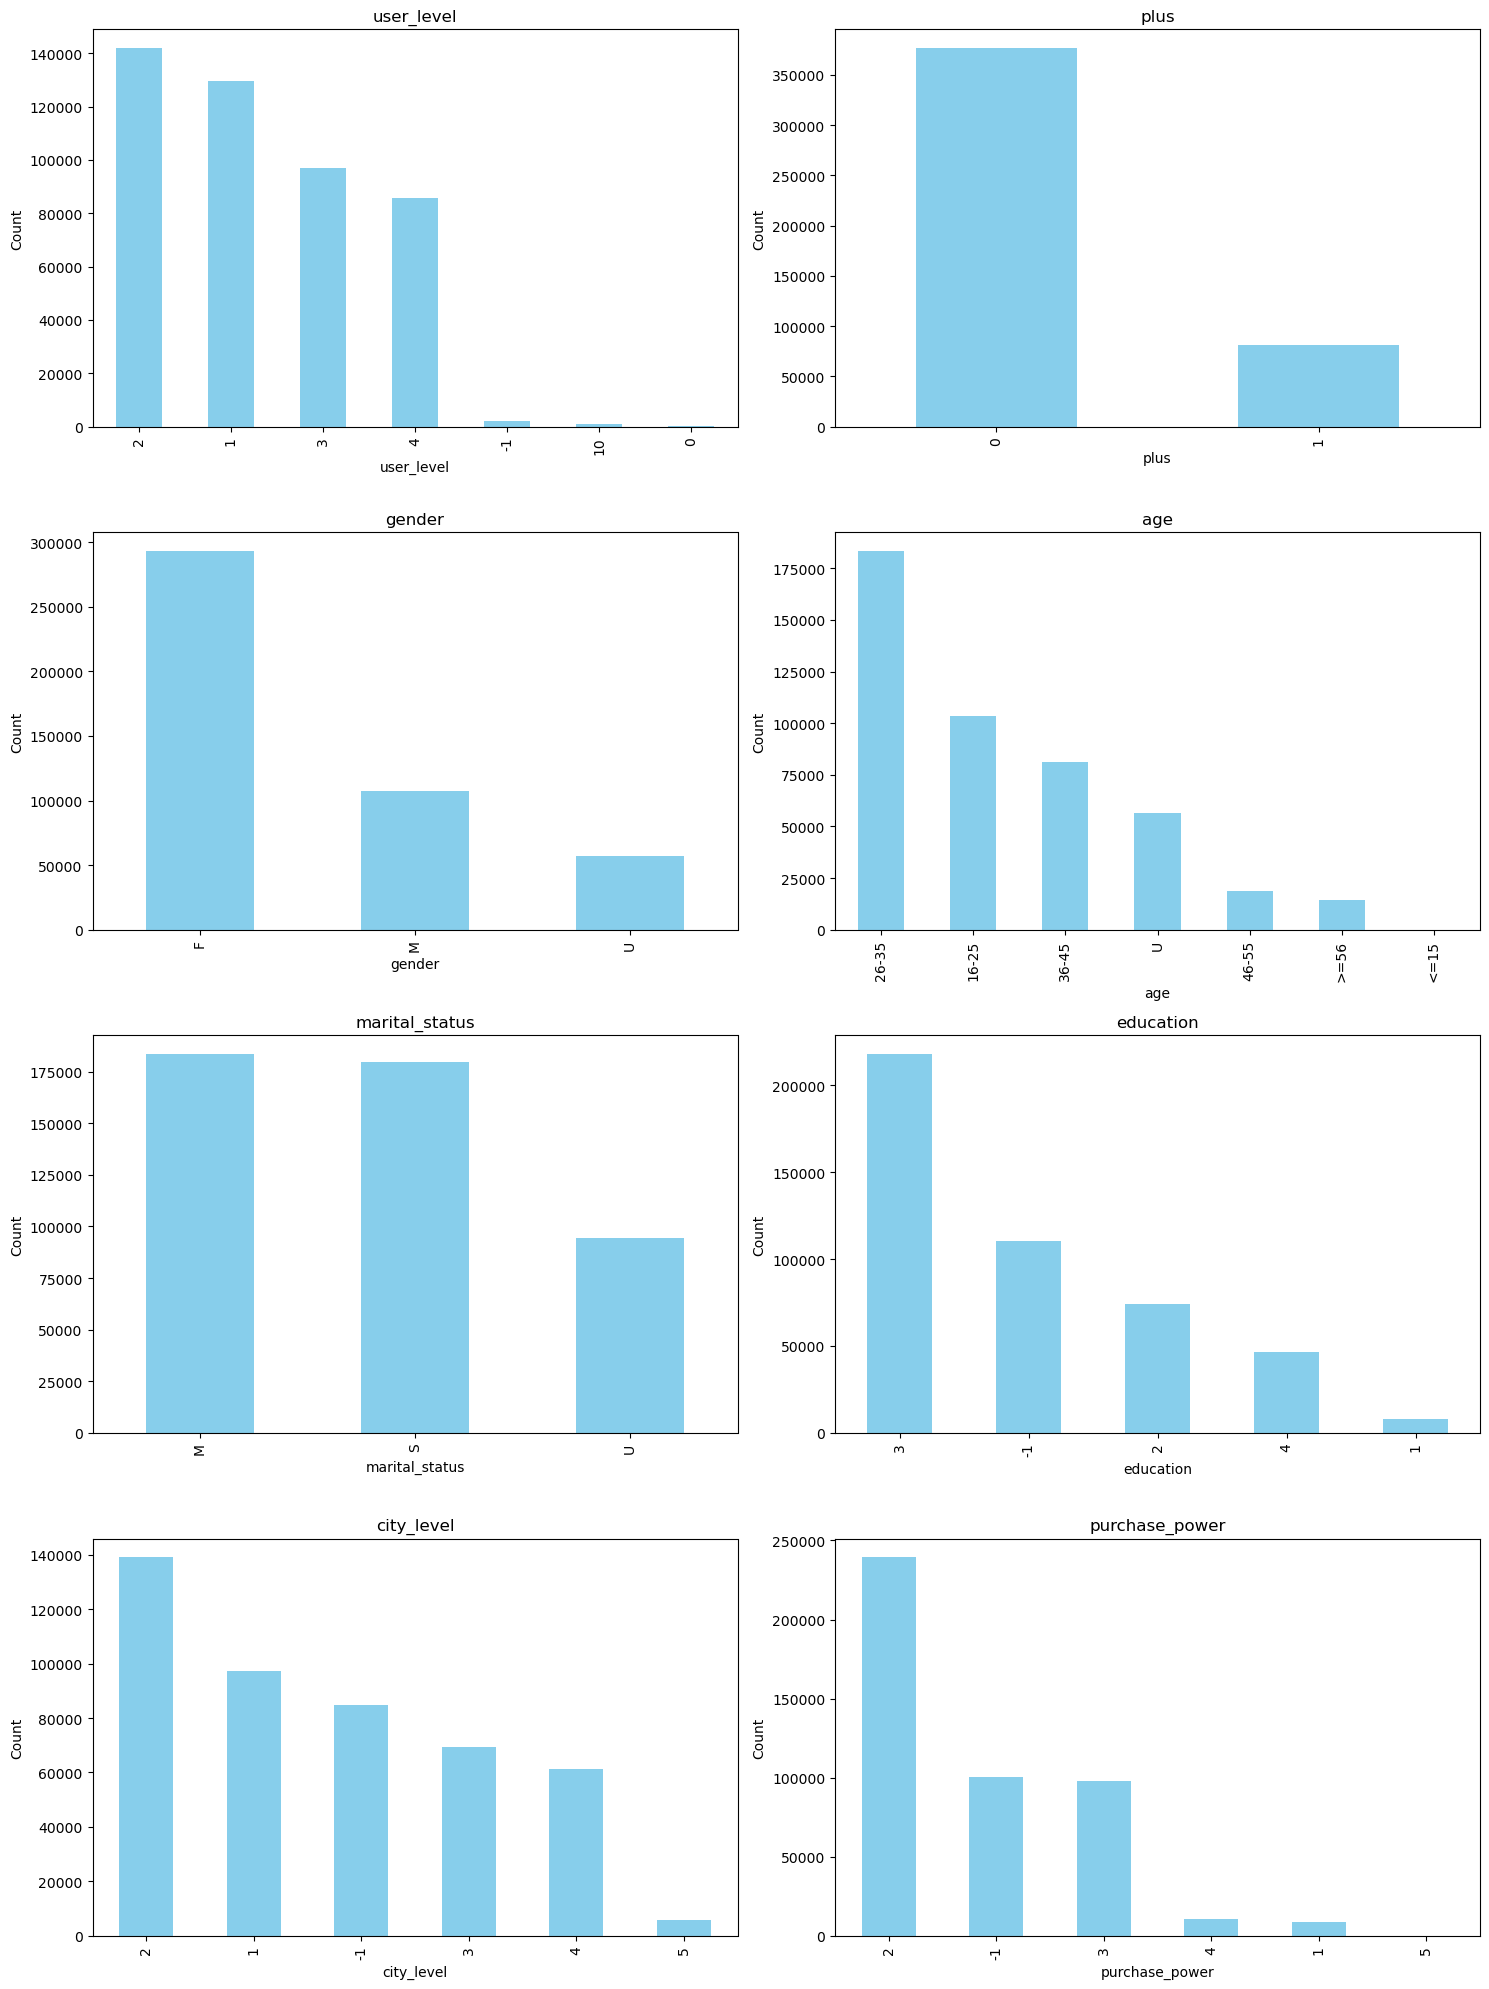

In [28]:
import matplotlib.pyplot as plt

# List of categorical columns to plot
categorical_columns = ['user_level', 'plus', 'gender', 'age', 'marital_status', 'education', 'city_level', 'purchase_power']

# Setting up the plotting area
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flattening the axes array for easy iteration

# Looping through the columns and creating bar plots
for i, col in enumerate(categorical_columns):
    user_df[col].value_counts().plot(kind='bar', ax=axes[i], title=col, color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Adjusting layout for better visibility
plt.tight_layout()
plt.show()



25. Next we move to the table that resulted from Q11-Q15. Sum the quantity by day (we created this variable in Q14.) and save the results.
Create a line graph based on it. Hint: The outcome of the sum is a Pandas Series. Use the .index to get the day and .values to get the sum for the plot.<br>
Or you may use reset_index() to turn the results to a dataframe.
Which day has the most quantity sold? 

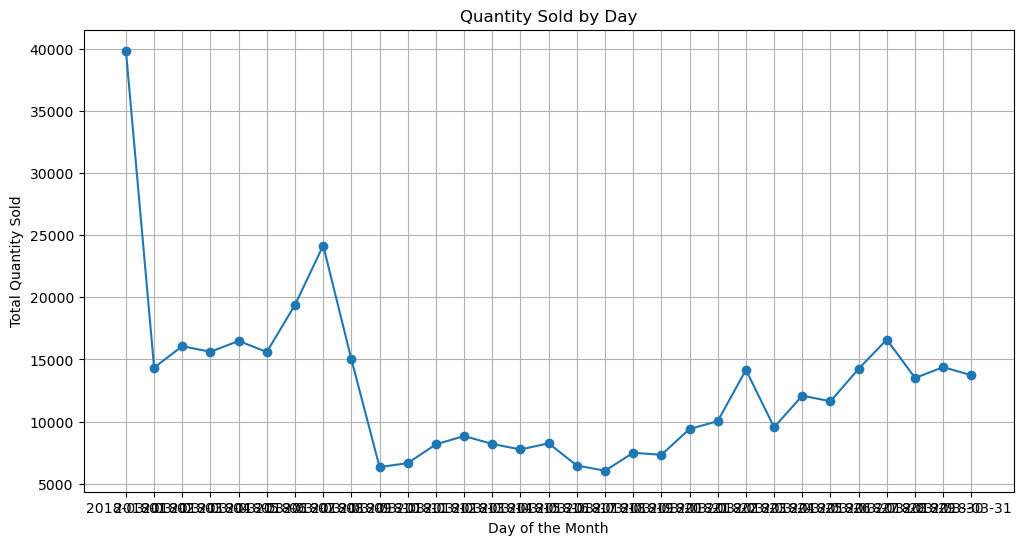

('2018-03-01', 39822)

In [29]:
import pandas as pd

# Load the datasets
order_data_path = r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_order_data.csv"
delivery_data_path = r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_delivery_data.csv"

order_data = pd.read_csv(order_data_path)
delivery_data = pd.read_csv(delivery_data_path)

# Performing an inner merge
merged_data = pd.merge(order_data, delivery_data, on='order_ID', how='inner')

#Sum the quantity by day
quantity_sum_by_day = merged_data.groupby('order_date')['quantity'].sum()



# Creating a line graph
plt.figure(figsize=(12, 6))
plt.plot(quantity_sum_by_day.index, quantity_sum_by_day.values, marker='o')
plt.title('Quantity Sold by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.show()

# Identifying the day with the most quantity sold
most_quantity_sold_day = quantity_sum_by_day.idxmax()
most_quantity_sold_day, quantity_sum_by_day[most_quantity_sold_day]


26. Repeat Q25 for variable 'order_hour' we created in Q14. When is the peak time for orders during a day? Can you describe the customer order trend over a day's time?

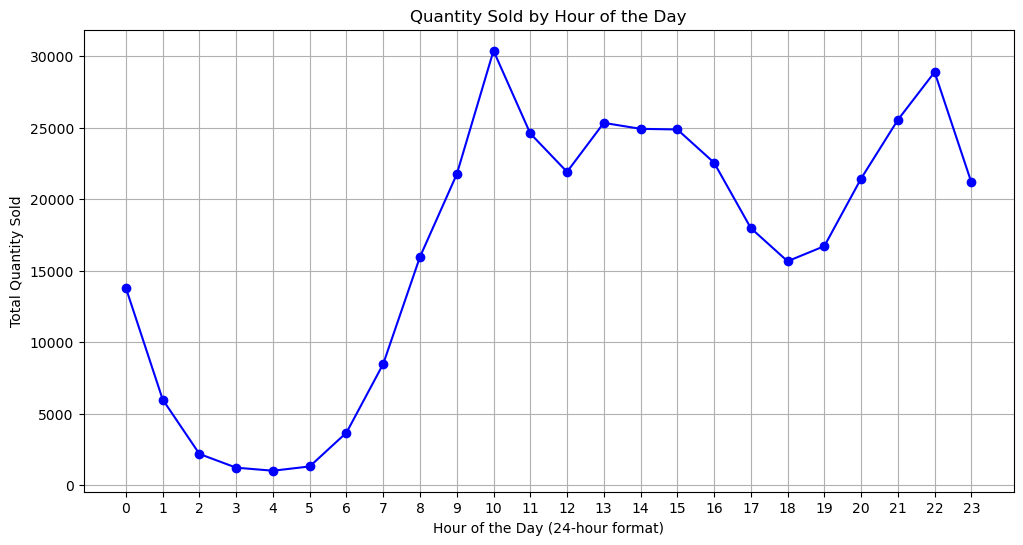

In [30]:
import matplotlib.pyplot as plt
# Load the datasets
order_data_path = r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_order_data.csv"
delivery_data_path = r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_delivery_data.csv"

order_data = pd.read_csv(order_data_path)
delivery_data = pd.read_csv(delivery_data_path)

# Performing an inner merge
merged_data = pd.merge(order_data, delivery_data, on='order_ID', how='inner')

merged_data['order_time'] = pd.to_datetime(merged_data['order_time'])
merged_data['order_hour'] = merged_data['order_time'].dt.hour


# Sum the quantity by hour
quantity_sum_by_hour = merged_data.groupby('order_hour')['quantity'].sum()

# Creating a line graph
plt.figure(figsize=(12, 6))
plt.plot(quantity_sum_by_hour.index, quantity_sum_by_hour.values, marker='o', linestyle='-', color='b')
plt.title('Quantity Sold by Hour of the Day')
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Total Quantity Sold')
plt.xticks(range(0, 24))  # Setting x-ticks for every hour of the day
plt.grid(True)
plt.show()

# Identifying the peak time for orders during a day
peak_order_time = quantity_sum_by_hour.idxmax()


27. Examine variable original_unit_price .<br>

1) Using describe() to check the stastitics. What is min, max and median?

In [31]:
# Assuming merged_data is your DataFrame
# Examining the 'original_unit_price' variable
original_unit_price_stats = merged_data['original_unit_price'].describe()

# Extracting min, max, and median values
min_price = original_unit_price_stats['min']
max_price = original_unit_price_stats['max']
median_price = original_unit_price_stats['50%']  # 50% percentile is the median

# Display the results
print("Minimum Price:", min_price)
print("Maximum Price:", max_price)
print("Median Price:", median_price)


Minimum Price: 0.0
Maximum Price: 7130.0
Median Price: 80.0


2) Find out the percentage of observations whose original_unit_price is greater than 350. Delete those observations using filtering. We will use the filtered dataset from now on.

In [32]:
# Calculate the percentage of observations with original_unit_price greater than 350
percentage_above_350 = (merged_data['original_unit_price'] > 350).mean() * 100

# Filtering out observations with original_unit_price greater than 350
filtered_data = merged_data[merged_data['original_unit_price'] <= 350]

# Print the percentage
print(f"Percentage of observations with original_unit_price > 350: {percentage_above_350}%")



Percentage of observations with original_unit_price > 350: 0.6290116318201565%


3) Examine the distribution of original_unit_price, using bins range from 0 to 350, width 10. Which price range has the most orders?

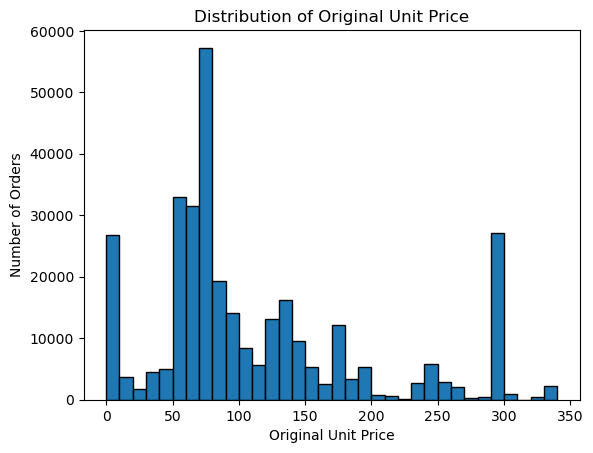

Price Range with Most Orders: (70, 80]
Number of Orders in this Range: 57997


In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming merged_data is your DataFrame
# Define the bins range
bins_range = range(0, 350, 10)  # Bins from 0 to 350 with width 10

# Plotting the histogram
plt.hist(merged_data['original_unit_price'], bins=bins_range, edgecolor='black')
plt.title('Distribution of Original Unit Price')
plt.xlabel('Original Unit Price')
plt.ylabel('Number of Orders')
plt.show()

# Finding the price range with the most orders
price_counts = pd.cut(merged_data['original_unit_price'], bins=bins_range).value_counts()
most_frequent_price_range = price_counts.idxmax()

# Print the most frequent price range
print("Price Range with Most Orders:", most_frequent_price_range)
print("Number of Orders in this Range:", price_counts[most_frequent_price_range])


28. Examine the distribution of final_unit_price, using bins range from -20 to 350, width 10. Comparing to original unit prices, how are the final prices different?

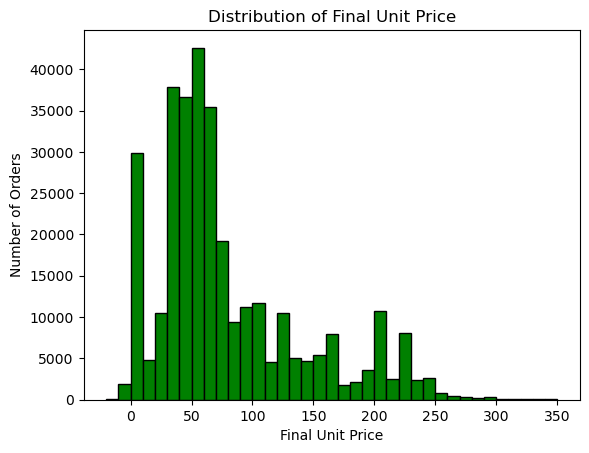

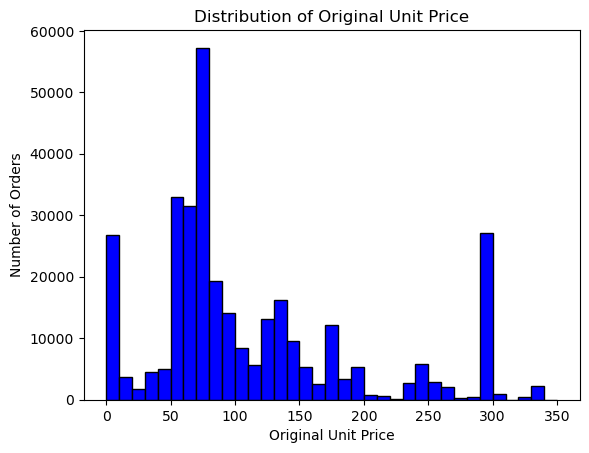

In [34]:
import matplotlib.pyplot as plt

# Assuming merged_data is your DataFrame
# Define the bins range for final unit price
bins_range_final_price = range(-20, 360, 10)

# Plotting the histogram for final unit price
plt.hist(merged_data['final_unit_price'], bins=bins_range_final_price, edgecolor='black', color='green')
plt.title('Distribution of Final Unit Price')
plt.xlabel('Final Unit Price')
plt.ylabel('Number of Orders')
plt.show()

# Re-plotting the histogram for original unit price for comparison
plt.hist(merged_data['original_unit_price'], bins=range(0, 360, 10), edgecolor='black', color='blue')
plt.title('Distribution of Original Unit Price')
plt.xlabel('Original Unit Price')
plt.ylabel('Number of Orders')
plt.show()


29. Create a new variable 'sales', which is equal to the multiplication of quantity and final unit price. Make a graph for sales by day as in Q25.

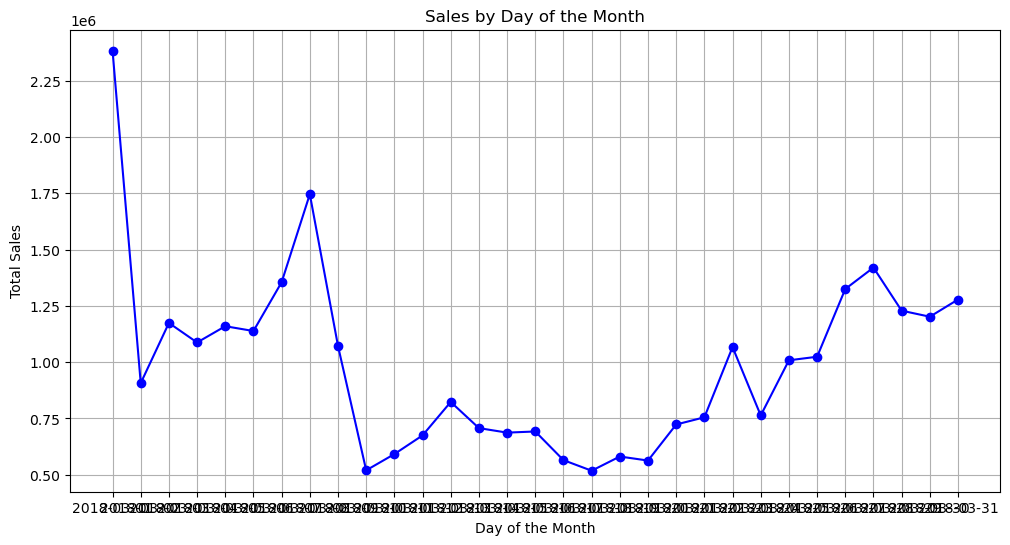

In [35]:
import matplotlib.pyplot as plt

# Assuming merged_data is your DataFrame
# Create the 'sales' variable
merged_data['sales'] = merged_data['quantity'] * merged_data['final_unit_price']

# Sum sales by day
sales_sum_by_day = merged_data.groupby('order_date')['sales'].sum()

# Creating a line graph for sales by day
plt.figure(figsize=(12, 6))
plt.plot(sales_sum_by_day.index, sales_sum_by_day.values, marker='o', linestyle='-', color='b')
plt.title('Sales by Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


30. Try to answer one descriptive question you asked in your project initial report.
Try to answer one descriptive question you asked in your project initial report. One of the question asked in our project is:How can you find out whether an order can be fulfilled by a specific distribution center?
Here is an explaination To determine if an order can be fulfilled by a specific distribution center, you would simply check two main things:

Inventory Availability: Verify if the distribution center has enough of the ordered item (SKU) in stock. This means checking the inventory level for that specific item at the distribution center against the quantity requested in the order.

Order and Inventory Dates Alignment: Ensure that the item was in stock at the distribution center on the date the order was placed.

In practical terms, this would involve looking at the inventory data for the distribution center and comparing it with the order details. If the inventory data shows sufficient quantity of the item available on or before the order date, the order can likely be fulfilled by that distribution center

### Assignment 11 starts from here: Q31-Q40.
We only covered a small part of data exploration in Assignment 10. If you are interested, you can make many more graphs to understand the data. <br>
Next we intend to build models to predict delivery times.

We want to use two sets of features to make predictions.<br>
1. order effect: This class of predictors captures thevcharacteristics of an order that may impact deliveryvtime, such as the number of items (SKUs), order size (quantity), order type (1P or 3P), discount rate and the number of gift items.<br>
2. User effect: The process may prioritize certain customers over others, for example, customers with a PLUSmembership or higher past purchase values.<br>
Note: Actually, it will be better if we can include real-time workloads of distribution centers. It can be done with this dataset, but might be a little too much for us. So, we will leave that part out.

We need to further process the data to prepare the features.<br>
<b>Note: Here I have done this part. You need to change the name of DataFrame "order_delivery_inner' to your dataframe name that results from all the previous steps. Make sure you run the cells before you proceed.</b>

31. The dataset we have so far is based on order-items. Each row is an item in an order. Now we need to aggregate by order to match order information with delivery information. Afterwards, each row is about one delivery / one order because we have already removed orders that have multiple deliveries.

First, let's calculate order values by multiply price and quantity.

In [43]:
# Original value of items
merged_data['originValue'] = merged_data['original_unit_price'] \
                                        * merged_data['quantity']

# Final value of items                                    
merged_data['finalValue'] = merged_data['final_unit_price'] \
                                    * merged_data['quantity']                                   

Next we aggregate by each order. <br>
Please pay attention to the variable names. They should be consistent with yours. Make changes when necessary. <br>

Variables that are the same across one order:<br>
user_ID<br>
order type - type_x<br>
delivery time - delivery_time<br>
order day - order_day<br>
order hour - order_hour<br>
<br>
<br>
Variables to be aggregated across one order:<br>
sku_ID - to count to calculate the number of different products<br>
quantity - to sum to calculate the order size<br>
originValue - to sum to calculate sales value with the original price<br>
finalValue - to sum to calculate final sales value<br>
discount rate<br>
gift_item - to sum to calculate the number of gift items<br>

Therefore, we need to do the following:<br>

1. For variables that are the same across one order, we can use the 'first' method to keep the value in the groupby result.<br>
2. For variables to be aggregated, we specify aggregation for each of them.<br>
3. We can use a dictionary to put all actions together.

In [46]:

merged_data['order_time'] = pd.to_datetime(merged_data['order_time'])
merged_data['order_hour'] = merged_data['order_time'].dt.hour

agg_dict = {
    'user_ID': 'first',
    'type_x': 'first',
    'order_time': 'first',
    'order_date': 'first',
    'order_hour':'first',
    'sku_ID': 'count',
    'quantity': 'sum',
    'originValue': 'sum',
    'finalValue': 'sum',
    'gift_item': 'sum'
}

order_agg = merged_data.groupby('order_ID').agg(agg_dict).reset_index()
order_agg.head()

,order_ID,user_ID,type_x,order_time,order_date,order_hour,sku_ID,quantity,originValue,finalValue,gift_item
0,0000095025,57648ed1fc,1,2018-03-19 11:11:34,2018-03-19,11,1,1,230.0,176.2,0
1,00000e13eb,c113527e40,2,2018-03-09 12:40:42,2018-03-09,12,1,1,56.0,56.0,0
2,0000132b39,c4f5626c0d,1,2018-03-13 16:30:35,2018-03-13,16,1,1,89.0,85.0,0
3,000064fa67,99439045cb,1,2018-03-02 10:56:17,2018-03-02,10,2,2,298.0,208.0,1
4,0000bde331,20d84fc11a,1,2018-03-17 14:22:54,2018-03-17,14,1,1,59.9,39.9,0


32. Merge user table with this aggregated order table.

In [60]:
user_df = pd.read_csv(r"C:\Users\kalee\Documents\assgnmnt8\JD Data\JD_user_data.csv")
order_user = pd.merge(order_agg, user_df, on = 'user_ID', how = 'inner')


33. We need to code a few more variables.

In [61]:
# First we remove the orders with originValue is 0
order_user = order_user[order_user['originValue'] != 0]

In [62]:
# Discount rate
order_user['dis_rate'] = (order_user['originValue'] - order_user['finalValue'])/order_user['originValue']
# order_hour coded to be busy vs. not busy
order_user['busy_hour'] = order_user['order_hour'].apply(lambda h: 1 if 8<=h<=22 else 0)

34. Prepare data for analysis. The target variable is 'delivery_time'.<br>
Features: 'type_x', 'sku_ID', 'quantity', 'finalValue', 'gift_item', 'plus', 'dis_rate', 'busy_hour'

In [63]:
# Assuming you have a dataset named 'order_user' after the previous steps
# Adjust the target variable and features based on your specific dataset
# Discount rate
order_user['dis_rate'] = (order_user['originValue'] - order_user['finalValue'])/order_user['originValue']
# order_hour coded to be busy vs. not busy
order_user['busy_hour'] = order_user['order_hour'].apply(lambda h: 1 if 8<=h<=22 else 0)
# Step 1: Select the target variable and features
target_variable = 'order_time'
features = ['type_x', 'sku_ID', 'quantity', 'finalValue', 'gift_item', 'dis_rate', 'busy_hour']

# Step 2: Filter the DataFrame to include only the selected columns
selected_data = order_user[[target_variable] + features]

# Step 3: Remove any rows with missing values (if applicable)
selected_data = selected_data.dropna()

# Step 4: Display the first few rows of the selected data
print(selected_data.head())


           order_time  type_x  sku_ID  quantity  finalValue  gift_item  \
0 2018-03-19 11:11:34       1       1         1       176.2          0   
1 2018-03-09 12:40:42       2       1         1        56.0          0   
2 2018-03-13 16:30:35       1       1         1        85.0          0   
3 2018-03-02 10:56:17       1       2         2       208.0          1   
4 2018-03-17 14:22:54       1       1         1        39.9          0   

   dis_rate  busy_hour  
0  0.233913          1  
1  0.000000          1  
2  0.044944          1  
3  0.302013          1  
4  0.333890          1  


35. Prepare the training and test datasets

In [65]:
from sklearn.model_selection import train_test_split

# Assuming 'delivery_time' is the target variable
target_variable = 'order_time'

# Features
features = ['type_x', 'sku_ID', 'quantity', 'finalValue', 'gift_item', 'dis_rate', 'busy_hour']

# Select relevant columns
data_for_analysis = order_user[[target_variable] + features]

# Remove any rows with missing values
data_for_analysis = data_for_analysis.dropna()

# Separate features and target variable
X = data_for_analysis[features]
y = data_for_analysis[target_variable]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Training set shape - Features:", X_train.shape, "Target:", y_train.shape)
print("Test set shape - Features:", X_test.shape, "Target:", y_test.shape)


Training set shape - Features: (224124, 7) Target: (224124,)
Test set shape - Features: (56031, 7) Target: (56031,)


36. Train a Decision Tree regression model.

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Create a Decision Tree regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training set
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)
# Convert datetime to numerical value (e.g., seconds or minutes)
y_test_numerical = (y_test - y_test.min()).dt.total_seconds()

# Make predictions on the test set
y_pred_numerical = decision_tree_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test_numerical, y_pred_numerical)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



Mean Squared Error (MSE): 2.313852773171591e+36
Root Mean Squared Error (RMSE): 1.5211353566239892e+18


37. Make predictions on the testing data.

In [68]:
# Make predictions on the testing set
y_pred = decision_tree_model.predict(X_test)

# Display the actual delivery times and predicted order times
predictions_df = pd.DataFrame({'Actual_order_Time': y_test, 'Predicted_order_Time': y_pred})
print(predictions_df.head())


         Actual_order_Time  Predicted_order_Time
64863  2018-03-26 18:27:12          1.520435e+18
172950 2018-03-28 20:43:33          1.520281e+18
141350 2018-03-28 18:06:39          1.522290e+18
61413  2018-03-07 22:27:12          1.520282e+18
74649  2018-03-09 09:36:40          1.520297e+18


38. Evaluate the model using RMSE

In [70]:
from sklearn.metrics import mean_squared_error
import numpy as np
# Convert datetime to numerical value (e.g., seconds or minutes)
y_test_numerical = (y_test - y_test.min()).dt.total_seconds()

# Make predictions on the test set
y_pred_numerical = decision_tree_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test_numerical, y_pred_numerical)
rmse = np.sqrt(mse)


# Print the RMSE
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 1.5211353566239892e+18


In [72]:
# To understand the RMSE, We check the statistics of the target variable.
order_user['order_time'].describe()
# It seems the mean is about 34 hours. With RMSE being about 27, 
# the prediction seems not very good.
# If you are interested to explore more, you may try some other prediction methods to see 
# whether you can get better results.

C:\Users\kalee\AppData\Local\Temp\ipykernel_15184\3790813961.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_user['order_time'].describe()


count                  280155
unique                 256429
top       2018-03-03 00:00:00
freq                       13
first     2018-03-01 00:00:00
last      2018-03-31 23:59:59
Name: order_time, dtype: object